In [1]:
import numpy as np
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from NB1 import BernoulliNB
from sklearn.naive_bayes import ComplementNB
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
#缩小图片规格，以减少计算量及因图片错误引起的无关因素规格为113x90
def depart(initial_matrix):
    kl = initial_matrix[15:]
    tk = []
    for i in range(113):    
        t = kl[i][20:110]
        tk.append(t)
    return tk
#离散处理数据像素，使其可能取值数量为17
def lisan(ol):
    for i in range(113):
        for j in range(90):
            ol[i][j] = (ol[i][j]//15)*15+7
    return ol
def lisan1(ol):
    for i in range(len(ol)):
        ol[i] = (ol[i]//15)*15+7
    return ol
def cou_male(a):
    '''
    统计男性数量
    '''
    t = 0
    for i in a:
        if i==1:
            t += 1
    return t
#寻找男性坐标
def findex(a):
    num = []
    for i in range(len(a)):
        if a[i] == 1:
            num.append(i)
    return num
#计算权重，注意，此时特征向量已经拉长处理
def weigh(data_x,data_y):
    kp = findex(data_y)#记录男性坐标
    k = [i for i in range(len(data_y))]
    #得出女性坐标
    for i in kp:
        k.remove(i)
    al = [0]*len(data_x[0])#建立特征向量的空数组
    #循环求解
    for n in kp:
        for t in k:
            for i in range(len(data_x[0])):
                #不同则加一
                if data_x[n][i]!=data_x[t][i]:
                    al[i] += 1
    he = sum(al)
    tp = []
    for i in range(len(al)):
        tp.append(al[i]/he)
    tj = tp.copy()
    tj.sort()
    a = []
    #归一化
    for i in tp:
        tpk = (i-tj[0])/(tj[len(tp)-1]-tj[0])
        a.append(tpk)
    #向上平移1
    for i in range(len(a)):
        a[i] += 1 
    #乘以一个倍数
    for i in range(len(a)):
        if a[i] != 1:
            a[i] = a[i]*3
    a = np.array(a)
    return a    

In [3]:
# 源数据处理
all_file = os.listdir('./face/rawdata')
# 读取所有data_x数据,  有问题的数据：第1186个，2412号；第1190个，2416号 ；2021号
data_x = np.zeros((len(all_file),128,128))
data_y = np.zeros(len(all_file))
data1_x = np.zeros((len(all_file),113,90))

# 将两个数据标签整理再一起
f = open('./face/faceDR','r')
r1 = f.readlines()
f.close()

f = open('./face/faceDS','r')
r2 = f.readlines()
f.close()
for i in r2:
    r1.append(i)

# 整理出data_x,和data_y
all_file = os.listdir('./face/rawdata')
for i in range(len(all_file)):
    with open('./face/rawdata/'+all_file[i],'rb') as f:
        x = np.fromfile(f,dtype=np.ubyte)
        t = x.reshape(128,-1)
        data_x[i] = t
        for j in r1:
            if all_file[i] in j:
                if 'female' in j:
                    data_y[i] = 0
                elif 'male' in j:
                    data_y[i] = 1
                else:
                    data_y[i] = None
                break
#缩小图片，及离散处理
for i in range(len(all_file)):
    data1_x[i] = depart(data_x[i])
#    data1_x[i] = lisan(data1_x[i])
#进一步处理
face_data = data1_x.reshape(data1_x.shape[0],-1)#拉长数组
face_target = data_y
#PCA降维
#pca = PCA(n_components = 300).fit(face_data)
#face_data = pca.transform(face_data)




In [5]:
#聚类排干扰
from sklearn.cluster import KMeans
n_clusters = 7
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(face_data)
y_pred = cluster.labels_

In [26]:
#寻找干扰集
a = 0
a1 = 0
number = []
number1 = []
for i in range(len(y_pred)):
    if y_pred[i]==3:
        a += 1
        number.append(i)
for i in range(len(y_pred)):
    if y_pred[i]==2:
        a1 += 1
        number1.append(i)
print(a,number1)

53 [24, 137, 326, 329, 335, 336, 338, 339, 384, 396, 404, 406, 407, 408, 409, 410, 412, 424, 429, 431, 438, 484, 492, 499, 510, 551, 552, 553, 554, 562, 564, 581, 612, 615, 616, 621, 637, 657, 816, 853, 854, 855, 866, 867, 883, 884, 885, 896, 897, 906, 907, 915, 941, 942, 945, 946, 947, 948, 951, 952, 985, 986, 1018, 1086, 1087, 1109, 1110, 1120, 1126, 1127, 1153, 1199, 1204, 1222, 1230, 1241, 1242, 1243, 1260, 1261, 1272, 1273, 1342, 1350, 1351, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1435, 1466, 1467, 1500, 1529, 1551, 1566, 1608, 1609, 1618, 1619, 1620, 1656, 1658, 1665, 1683, 1684, 1698, 1708, 1723, 1737, 1740, 1776, 1814, 1815, 1818, 1819, 1821, 1822, 1827, 1846, 1847, 1848, 1868, 1869, 1910, 2020, 2043, 2045, 2047, 2133, 2139, 2141, 2145, 2146, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2215, 2218, 2220, 2221, 2223, 2224, 2226, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 223

In [19]:
#观察所在类别
y_pred[2818]

2

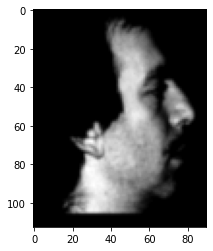

In [20]:
#观察样本
kpk = data1_x[2818]
plt.imshow(kpk,cmap=plt.cm.gray)
plt.show()

In [7]:
#处理数据
ar = number1+number
dataj_x = np.delete(face_data, ar, axis=0)
data1_y = np.delete(data_y, ar)
print(dataj_x.shape)
print(data1_y.shape)
print(len(ar))

(3450, 10170)
(3450,)
533


In [8]:
#处理完毕
face_data = dataj_x
face_target = data1_y
print(face_data.shape)
print(face_target.shape)

(3450, 10170)
(3450,)


In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(face_data,face_target,shuffle = True,random_state=120,test_size = 0.3)

In [16]:
#归一化
mms = MinMaxScaler().fit(X_train)
X_train_ = mms.transform(X_train)
X_test_=mms.transform(X_test)
face_data_ = mms.transform(face_data)

In [9]:
data5_x = face_data[:500]
data5_y = face_target[:500]
data6_x = face_data[500:1000]
data6_y = face_target[500:1000]

In [12]:
ap = weigh(data5_x,data5_y)
lkj = [ap,ap]

In [17]:
bnbk = BernoulliNB().fit(data5_x,data5_y)
#bnbkk = BernoulliNB(weigh = lkj).fit(data5_x,data5_y)
score1 = bnbk.score(data6_x,data6_y)
score2 = bnbk.score(data6_x,data6_y)
print(score1,score2)

0.508 0.508


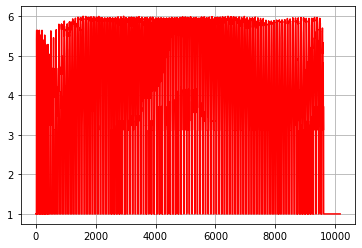

In [10]:
#计算权重
data2_x = np.zeros((len(dataj_x),10170))
for i in range(len(dataj_x)):
    data2_x[i] = lisan1(dataj_x[i])
face_data1 = data2_x
face_data_tes = face_data1[2000:2050]
data_y_tes = data_y[2000:2050]
e = weigh(face_data_tes,data_y_tes)
he = [e,e]
plt.plot(range(len(e)),e,color='red')
plt.grid()
plt.show()

In [12]:
#print(face_data1.shape)
print(X_train.shape)

(2415, 10170)


In [9]:
#计算权重（训练版本）
data3_x = np.zeros((len(X_train),10170))
for i in range(len(X_train)):
    data3_x[i] = lisan1(X_train[i])
data4_x = data3_x[:2415:5]
Y_train1 = Y_train[:2415:5]
print(data4_x.shape)
print(Y_train1.shape)
print(cou_male(Y_train1))

(483, 10170)
(483,)
290


In [10]:
print(data3_x.shape)

(2415, 10170)


In [11]:
pj = weigh(data4_x,Y_train1)
plj = [pj,pj]

In [31]:
#计算权重（全值版本）
data2_x = np.zeros((len(dataj_x),10170))
for i in range(len(dataj_x)):
    data2_x[i] = lisan1(dataj_x[i])



#k = weigh(data2_x,data1_y)
#ke = [k,k]
#plt.plot(range(len(e)),e,color='red')
#plt.grid()
#plt.show()

In [ ]:
print(data2_x[2660][4500])
print(data2_x.shape)
print(data1_y.shape)

In [ ]:
k = weigh(data2_x,data1_y)
ke = [k,k]
plt.plot(range(len(e)),e,color='red')
plt.grid()
plt.show()

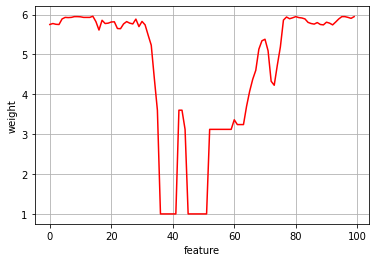

In [11]:
plt.plot(range(100),e[4000:4100],color='red')
plt.grid()
plt.ylabel('weight')
plt.xlabel('feature')
plt.show()

In [40]:
#实例化模型
#gnb = GaussianNB().fit(X_train,Y_train) 
#mnb = MultinomialNB().fit(X_train,Y_train)
#bnb = BernoulliNB().fit(X_train,Y_train) 
bnb1 = BernoulliNB(weigh = he).fit(X_train,Y_train)
#bnb_ = BernoulliNB(binarize=0.0,weigh = he).fit(X_train_,Y_train) 
#cnb = ComplementNB().fit(X_train,Y_train) 

In [41]:
#acc_score = gnb.score(X_test,Y_test)#高斯分布
#acc_score1 = mnb.score(X_test,Y_test)#多项式朴素贝叶斯分类器MultinomialNB
#acc_score2 = bnb.score(X_test,Y_test)#伯劳尼朴素贝叶斯分类器BernoulliNB
acc_score21 = bnb1.score(X_test,Y_test)
#acc_score2_1 = bnb_.score(X_test_,Y_test)
#acc_score3 = cnb.score(X_test,Y_test)#补集多项式
#print(acc_score,acc_score1,acc_score2,acc_score3)
#print(acc_score,acc_score2)
print(acc_score21)#PCA以后能得73~72

0.6231884057971014


In [22]:
#cv1 = cross_val_score(bnb,face_data,face_target,cv=5)
cv2 = cross_val_score(bnb1,face_data,face_target,cv=5)

In [24]:
print(cv2)
print(sum(cv2)/5)

[0.63623188 0.63623188 0.63478261 0.63478261 0.63478261]
0.6353623188405797


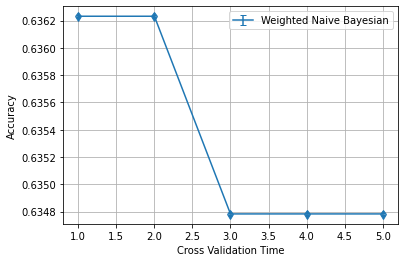

In [25]:
import numpy as np
import matplotlib.pyplot as plt
#各个模型效果对比图

fig = plt.figure()
x = [1,2,3,4,5]
yerr = np.linspace(0.05, 0.2, 5)
#plt.errorbar(x, cv1,  yerr=yerr, uplims=True, lolims=True,
#             label='Naive Bayesian')
plt.errorbar(x, cv2,  yerr=yerr, uplims=True, lolims=True,
             label='Weighted Naive Bayesian')
plt.grid()
plt.xlabel('Cross Validation Time')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

In [37]:
#集成学习
clf = AdaBoostClassifier(base_estimator=bnb1, n_estimators=20)
scores = cross_val_score(clf, face_data,face_target, cv=5)
print('Adaboost-NB AUC：',scores.mean())

Adaboost-NB AUC： 0.36463768115942036
